Index(['country', 'year', 'co2_per_capita', 'gdp_per_capita', 'population',
       'gdp', 'co2', 'treated'],
      dtype='object')


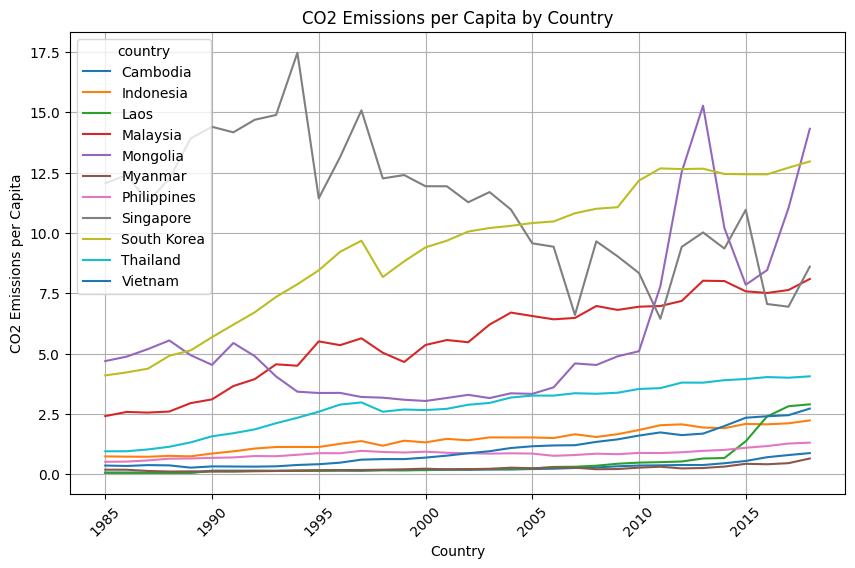

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from synthdid.synthdid import Synthdid as sdid
import os

os.chdir('/Users/jxrill/Desktop/Econ Seminar Project')

europe_df = pd.read_csv('output/europe_df.csv')
kazakhstan_df = pd.read_csv('output/kazakhstan_df.csv')
korea_df = pd.read_csv('output/korea_df.csv')

print(europe_df.columns)

kazakhstan_pivot = korea_df.pivot(index='year', columns='country', values='co2_per_capita')
kazakhstan_pivot.plot(kind='line', figsize=(10, 6))

# Set the title and labels
plt.title('CO2 Emissions per Capita by Country')
plt.xlabel('Country')
plt.ylabel('CO2 Emissions per Capita')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.show()

In [3]:
import synthdid.model

ModuleNotFoundError: No module named 'synthdid.model'

In [13]:
from synthdid.model import SynthDID

ModuleNotFoundError: No module named 'synthdid.model'

      ATT Std. Err.  t P>|t|
0 -2.0223         -  -     -
            ATT Std. Err.  t P>|t|
0 -4.665148e+12         -  -     -
            ATT Std. Err.  t P>|t|
0 -6.000049e+09         -  -     -


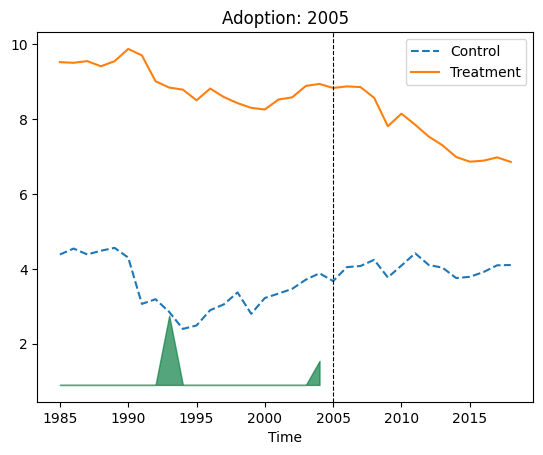

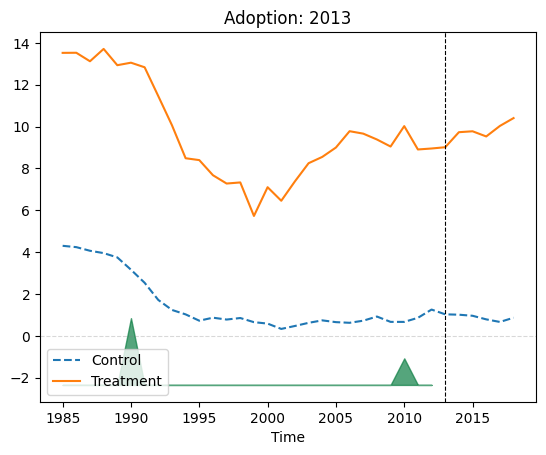

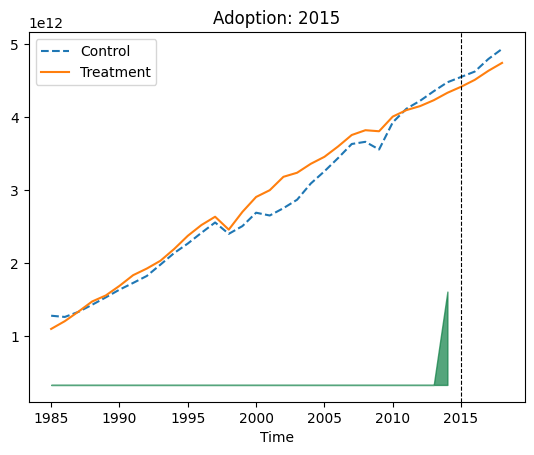

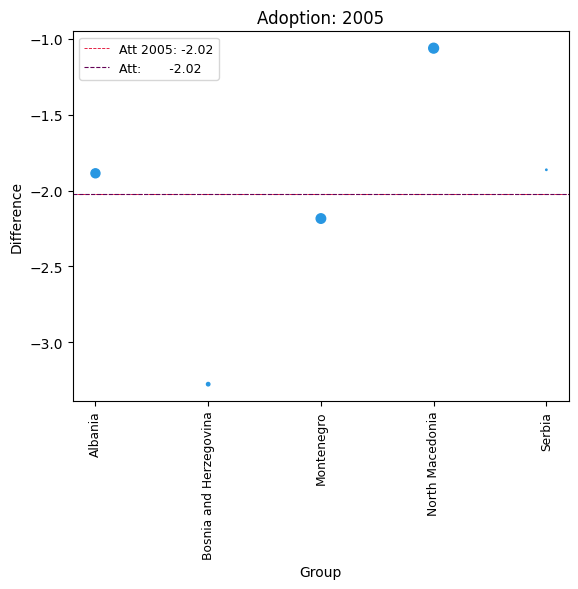

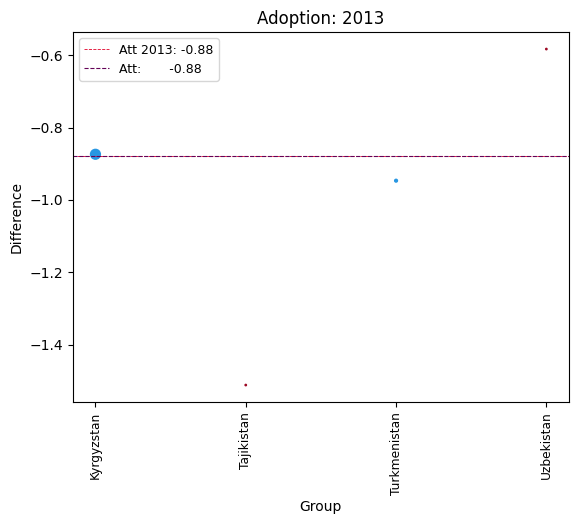

In [4]:
# Implementing synthetic did    

europe_est = sdid(europe_df, unit='country', time= 'year', treatment='treated', outcome='co2_per_capita').fit()
print(europe_est.summary().summary2)
kazakhstan_est = sdid(kazakhstan_df, unit='country', time= 'year', treatment='treated', outcome='co2_per_capita', covariates = ['gdp_per_capita']).fit()
print(kazakhstan_est.summary().summary2)
kor_est = sdid(korea_df, unit='country', time= 'year', treatment='treated', outcome='co2_per_capita', covariates = ['gdp_per_capita']).fit()
print(kor_est.summary().summary2)

europe_est.fit(cov_method='projected').summary().summary2
kazakhstan_est.fit(cov_method='projected').summary().summary2

europe_est.plot_outcomes()
kazakhstan_est.plot_outcomes()
kor_est.plot_outcomes()

europe_est.plot_weights()
kazakhstan_est.plot_weights()

            ATT Std. Err.  t P>|t|
0 -1.805786e+41         -  -     -
            ATT Std. Err.  t P>|t|
0 -9.987425e+42         -  -     -
            ATT Std. Err.  t P>|t|
0 -2.379619e+44         -  -     -


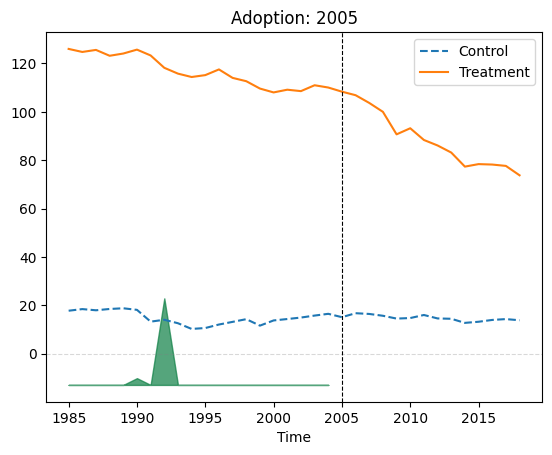

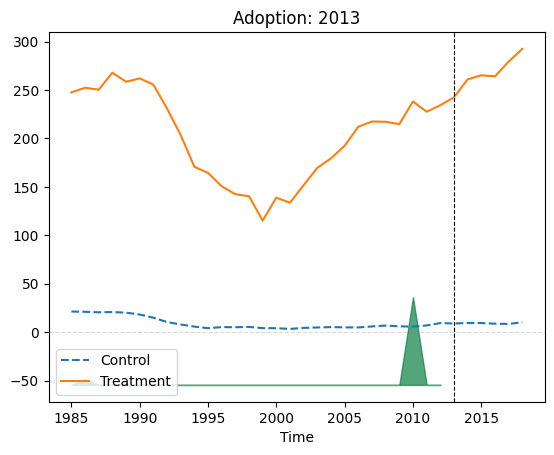

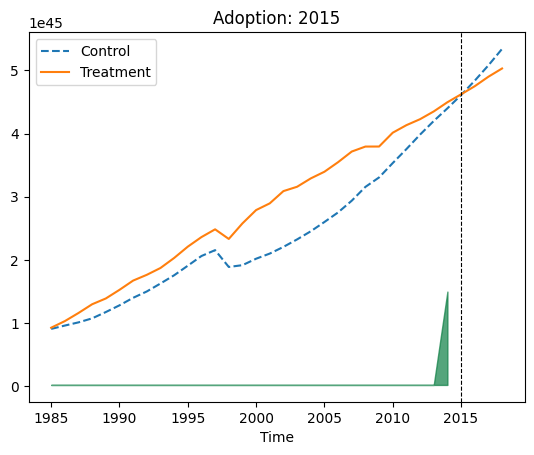

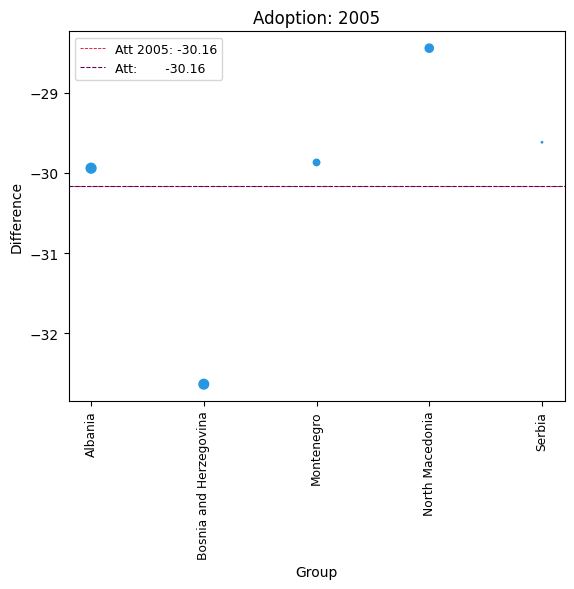

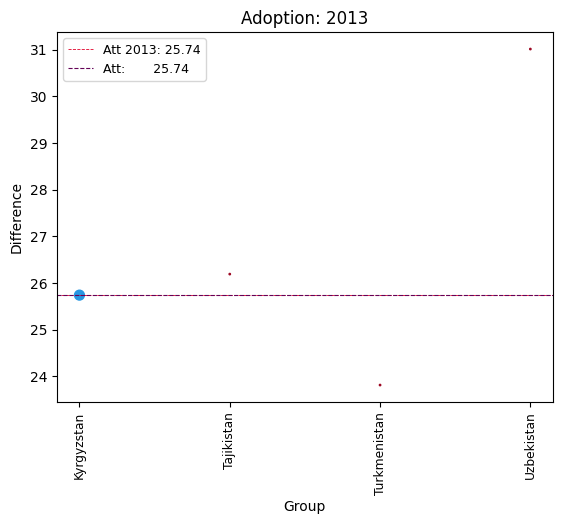

In [47]:
# Implementing synthetic did    

europe_est = sdid(europe_df, unit='country', time= 'year', treatment='treated', outcome='co2', covariates = ['gdp', 'population']).fit()
print(europe_est.summary().summary2)
kazakhstan_est = sdid(kazakhstan_df, unit='country', time= 'year', treatment='treated', outcome='co2', covariates = ['gdp', 'population']).fit()
print(kazakhstan_est.summary().summary2)
kor_est = sdid(korea_df, unit='country', time= 'year', treatment='treated', outcome='co2', covariates = ['gdp', 'population']).fit()
print(kor_est.summary().summary2)

europe_est.fit(cov_method='projected').summary().summary2
kazakhstan_est.fit(cov_method='projected').summary().summary2

europe_est.plot_outcomes()
kazakhstan_est.plot_outcomes()
kor_est.plot_outcomes()

europe_est.plot_weights()
kazakhstan_est.plot_weights()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.62863D+06    |proj g|=  8.33333D-01
  ys=-3.480E+05  -gs= 3.021E+04 BFGS update SKIPPED
  ys=-6.751E+03  -gs= 4.481E+03 BFGS update SKIPPED

At iterate    3    f=  1.93747D+06    |proj g|=  8.34324D-01
  ys=-1.001E+03  -gs= 8.678E+02 BFGS update SKIPPED

At iterate    6    f=  1.93479D+06    |proj g|=  8.34312D-01
  ys=-6.979E+00  -gs= 2.262E+01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      8    103     29     4     5   8.343D-01   1.935D+06
  F =   1934784.9042104124     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.65146D+06    |proj g|=  9.99418D-01
  ys=-4.334E+04  -gs= 7.080E+04 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored d

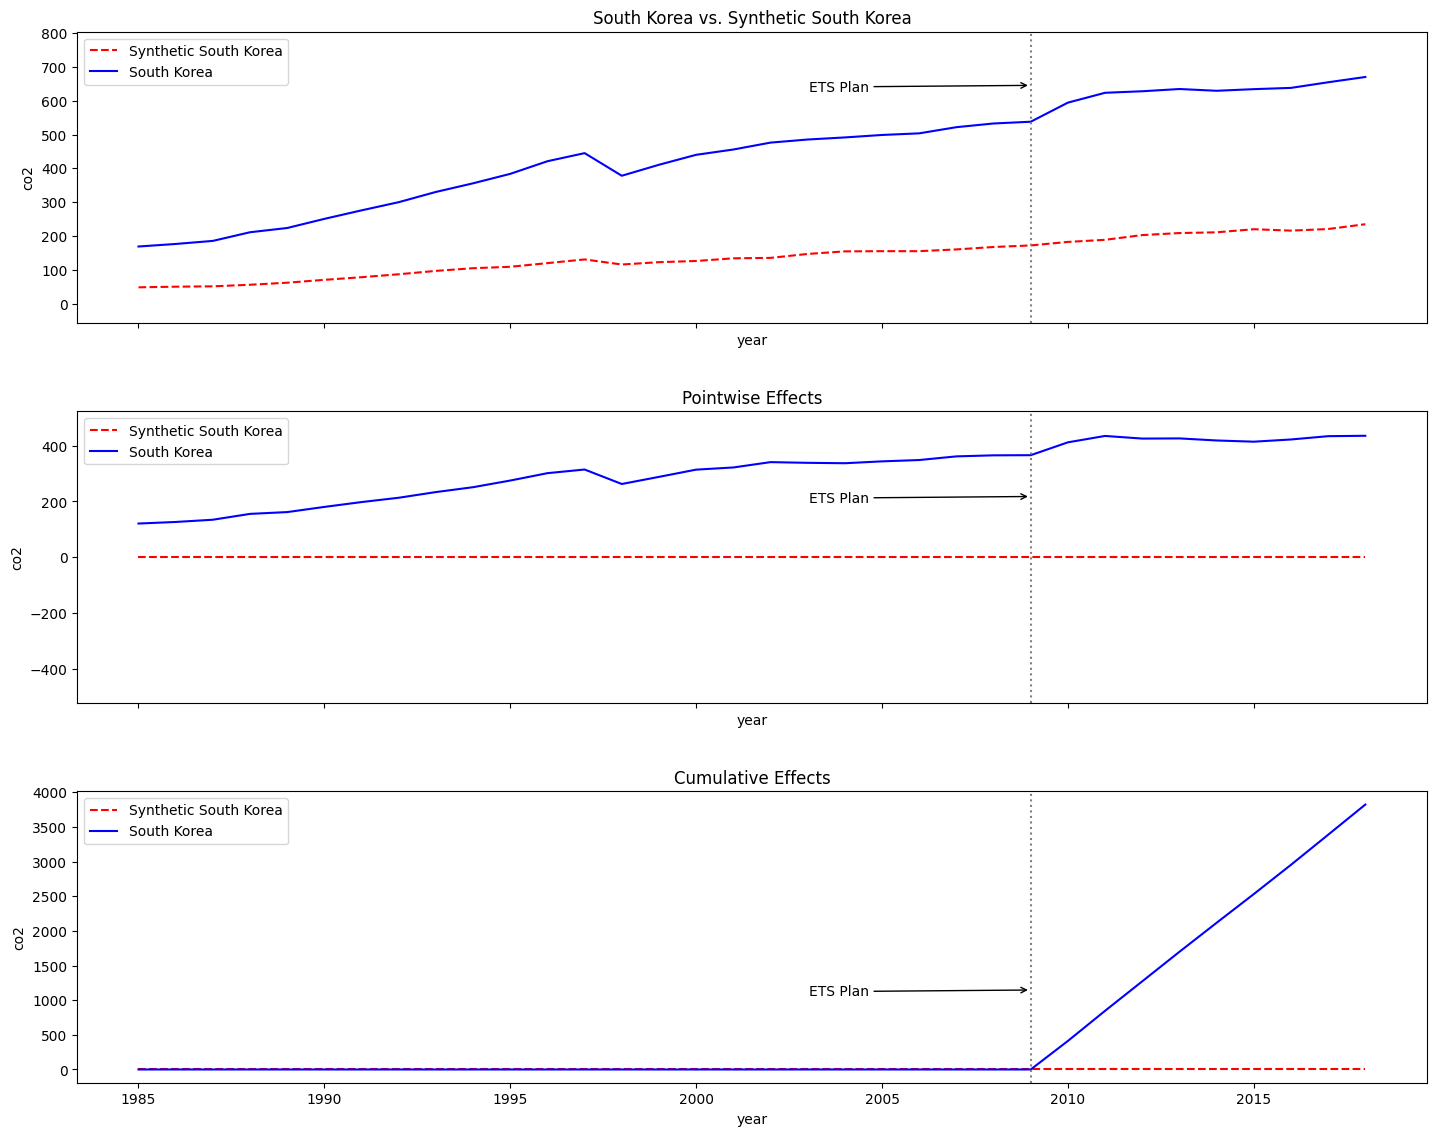

In [48]:
import pandas as pd
from SyntheticControlMethods import Synth


sc = Synth(korea_df, 'co2', 'country', 'year', 2010, 'South Korea', pen=0)
sc.plot(['original', 'pointwise', 'cumulative'], treated_label = 'South Korea', synth_label = 'Synthetic South Korea', treatment_label = 'ETS Plan')